<a href="https://colab.research.google.com/github/pcpiscator/Ciencia-de-dados/blob/master/camara_X_stf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd                  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse 
# bibliotecas para visualização
import plotly.offline as py
import plotly.graph_objs as go
# bibliotecas para visualização


%matplotlib inline

In [35]:
fonte = "https://raw.githubusercontent.com/pcpiscator/Ciencia-de-dados/master/camara_X_stf.txt"
dados = pd.read_csv(fonte)
dados.head()

,Deputado,Partido,Estado,Voto
0,Abílio Santana,PL,BA,Sim
1,Abou Anni,PSL,SP,Sim
2,Acácio Favacho,PROS,AP,Sim
3,Adolfo Viana,PSDB,BA,Sim
4,Adriana Ventura,NOVO,SP,Não


In [36]:
mapeamento_Voto = {"Sim": 0, "Não": 1}
dados['Voto'] = dados['Voto'].map(mapeamento_Voto)

dados.head()

,Deputado,Partido,Estado,Voto
0,Abílio Santana,PL,BA,0.0
1,Abou Anni,PSL,SP,0.0
2,Acácio Favacho,PROS,AP,0.0
3,Adolfo Viana,PSDB,BA,0.0
4,Adriana Ventura,NOVO,SP,1.0


In [37]:
dados

,Deputado,Partido,Estado,Voto
0,Abílio Santana,PL,BA,0.0
1,Abou Anni,PSL,SP,0.0
2,Acácio Favacho,PROS,AP,0.0
3,Adolfo Viana,PSDB,BA,0.0
4,Adriana Ventura,NOVO,SP,1.0
...,...,...,...,...
508,Zé Carlos,PT,MA,0.0
509,Zé Neto,PT,BA,0.0
510,Zé Silva,SOLIDARIEDADE,MG,0.0
511,Zé Vitor,PL,MG,0.0


In [ ]:
dados.shape

(513, 4)

In [38]:
dados[["Deputado","Partido"]]

,Deputado,Partido
0,Abílio Santana,PL
1,Abou Anni,PSL
2,Acácio Favacho,PROS
3,Adolfo Viana,PSDB
4,Adriana Ventura,NOVO
...,...,...
508,Zé Carlos,PT
509,Zé Neto,PT
510,Zé Silva,SOLIDARIEDADE
511,Zé Vitor,PL


In [39]:
dados["Partido"].value_counts()

PSL              53
PT               52
PL               42
PP               40
PSD              35
MDB              34
PSDB             32
REPUBLICANOS     32
PSB              30
DEM              29
PDT              26
SOLIDARIEDADE    14
PTB              11
PROS             11
PSC              10
PSOL             10
PODE             10
CIDADANIA         8
NOVO              8
AVANTE            8
PCdoB             7
PATRIOTA          6
PV                4
REDE              1
Name: Partido, dtype: int64

In [40]:
dados[["Deputado","Voto"]]

,Deputado,Voto
0,Abílio Santana,0.0
1,Abou Anni,0.0
2,Acácio Favacho,0.0
3,Adolfo Viana,0.0
4,Adriana Ventura,1.0
...,...,...
508,Zé Carlos,0.0
509,Zé Neto,0.0
510,Zé Silva,0.0
511,Zé Vitor,0.0


In [41]:
dados[["Estado","Voto"]].value_counts()

Estado  Voto
SP      0.0     50
MG      0.0     37
BA      0.0     34
RJ      0.0     28
PE      0.0     24
SP      1.0     20
PR      0.0     19
CE      0.0     17
RS      1.0     17
GO      0.0     14
RJ      1.0     13
PA      0.0     13
RS      0.0     12
MA      0.0     12
MG      1.0     12
PR      1.0     10
PI      0.0      9
SC      1.0      9
PB      0.0      9
SE      0.0      8
AP      0.0      7
RR      0.0      7
AL      0.0      7
SC      0.0      7
MS      0.0      6
AM      0.0      6
DF      0.0      6
AC      0.0      6
RN      0.0      6
MT      0.0      5
TO      0.0      5
ES      1.0      5
        0.0      5
RO      0.0      5
CE      1.0      5
BA      1.0      4
PA      1.0      4
MA      1.0      4
MT      1.0      3
RO      1.0      3
AC      1.0      2
AM      1.0      2
RN      1.0      2
TO      1.0      2
MS      1.0      2
DF      1.0      2
GO      1.0      2
PB      1.0      2
AP      1.0      1
PE      1.0      1
AL      1.0      1
RR      1.0      1

Como se pode ver abaixo um total de 383 parlamentares deram voto a favor da manutenção da prisão do deputado.



In [44]:
dados.query("Voto != 1")["Voto"]

0      0.0
1      0.0
2      0.0
3      0.0
5      0.0
      ... 
508    0.0
509    0.0
510    0.0
511    0.0
512    0.0
Name: Voto, Length: 383, dtype: float64

Como se pode  ver abaixo um total de 149 parlamentares deram voto negativo à manutenção da prisão do deputado ou se abstiveram.


In [45]:
dados.query("Voto != 0")["Voto"]

4      1.0
9      1.0
10     NaN
14     1.0
15     1.0
      ... 
484    1.0
485    1.0
498    1.0
499    1.0
506    1.0
Name: Voto, Length: 149, dtype: float64

In [ ]:
dados[["Partido","Voto"]].value_counts()

Partido        Voto      
PT             Sim           51
PSL            Não           38
PP             Sim           33
PL             Sim           32
REPUBLICANOS   Sim           28
MDB            Sim           28
PSDB           Sim           26
PSB            Sim           25
PSD            Sim           24
DEM            Sim           23
PDT            Sim           21
SOLIDARIEDADE  Sim           13
PSL            Sim           11
PSOL           Sim           10
PTB            Não            9
PSD            Não            9
NOVO           Não            8
PL             Não            8
PCdoB          Sim            7
PODE           Não            7
AVANTE         Sim            7
PSC            Não            7
PROS           Não            6
CIDADANIA      Sim            6
PP             Não            6
MDB            Não            5
DEM            Não            5
PROS           Sim            5
PSDB           Não            5
PSB            Não            4
PSC           

Deputados que votaram **NÃO**.

In [47]:
dados.query("Voto != 0")[['Deputado',"Voto"]]

,Deputado,Voto
4,Adriana Ventura,1.0
9,Afonso Hamm,1.0
10,Afonso Motta,NaN
14,Alan Rick,1.0
15,Alceu Moreira,1.0
...,...,...
484,Uldurico Junior,1.0
485,Vaidon Oliveira,1.0
498,Vinicius Poit,1.0
499,Vitor Hugo,1.0


Deputados que votaram **SIM**

In [48]:
dados.query("Voto != 1")[['Deputado',"Voto"]]

,Deputado,Voto
0,Abílio Santana,0.0
1,Abou Anni,0.0
2,Acácio Favacho,0.0
3,Adolfo Viana,0.0
5,Adriano do Baldy,0.0
...,...,...
508,Zé Carlos,0.0
509,Zé Neto,0.0
510,Zé Silva,0.0
511,Zé Vitor,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



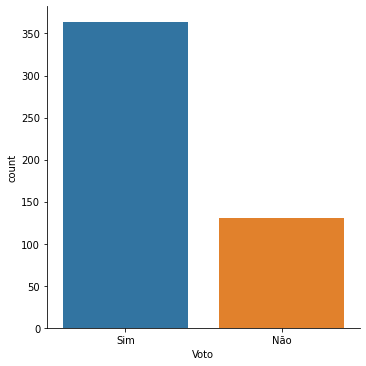

In [49]:
Voto_map = {1: 'Sim', 0: 'Não'}
sns.catplot('Voto',data=dados, kind='count').set_xticklabels(Voto_map.values())



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



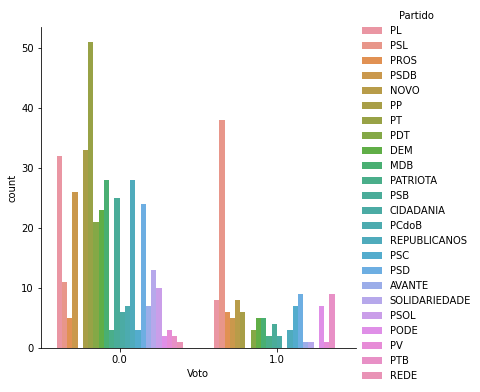

In [50]:

sns.catplot('Voto', data=dados, hue='Partido', kind='count')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



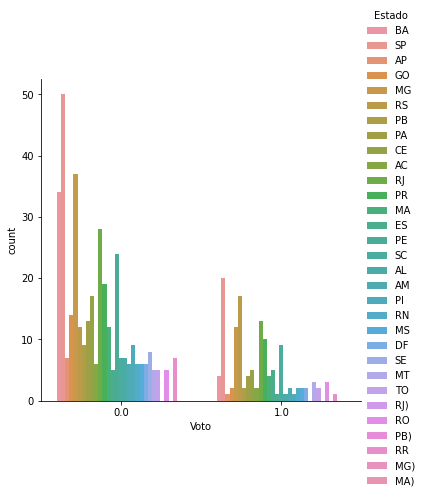

In [ ]:
sns.catplot('Voto', data=dados, hue='Estado', kind='count')



In [ ]:
#Resultado  em um gráfico de pizza.
dcount = dados['Voto'].value_counts()
# O método Pie() tem o parâmetro "labels" para definir cada setor do gráfico. Em "values" informamos os valores para cada setor. 
# Por fim, em "pull" podemos indicar qual "fatia" deseja ficar afastada, e quanto será este afastamento. No exemplo abaixo, todas ficaram afastadas do centro.
data=[go.Pie(labels=list(dcount.index), values=dcount.values.tolist(), pull=[0.1,0.1,0.1,0.1,0.1,0.1])]

py.iplot(data)

In [ ]:
#Resultado  por estado em um gráfico de pizza.
dcount = dados[['Voto','Estado']].value_counts()
# O método Pie() tem o parâmetro "labels" para definir cada setor do gráfico. Em "values" informamos os valores para cada setor. 
# Por fim, em "pull" podemos indicar qual "fatia" deseja ficar afastada, e quanto será #este afastamento. No exemplo abaixo, todas ficaram afastadas do centro.
data=[go.Pie(labels=list(dcount.index), values=dcount.values.tolist(), pull=[1.0,1.0,1.0,1.0,1.0,1.0])]
py.iplot(data)


(-1.1200228056320096,
 1.1009534669348575,
 -1.103713137262319,
 1.120261048603897)

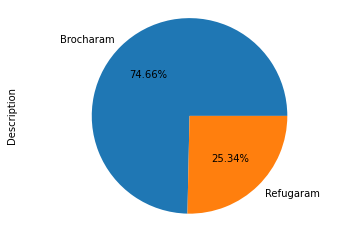

In [ ]:
#Resultado da votação em um gráfico de pizza.
def get_description(row):
     if row.Voto != 1:
       return 'Brocharam'
     elif row.Voto != 0:
        return 'Refugaram'
        

dados['Description'] = dados.apply(get_description, axis=1)
dados.Description.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')

In [ ]:
# Responda aqui a questão 1
#Criando o gráfico, onde nbinsx indica o número de setores a serem analisados no gráfico
data = [go.Histogram(x = dados['Voto'],nbinsx=3)]

# Criando o layout
layout = go.Layout(title='Histograma analisando os votos dos deputados',
                   yaxis={'title':'Voto'},
                   xaxis={'title':'Classificação:0-Sim;1-Não'})

# Criando a figura que será exibida, passando informações nas variáveis data e lauyout
fig = go.Figure(data=data, layout=layout)

#Exibindo o gráfico
py.iplot(fig)